In [1]:
library(forecast)
library(urca)
kings <- scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)
kings

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

In [4]:
# yearly data
ts_kings<-ts(kings, frequency = 1)
ts_kings

A Time Series:
 [1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

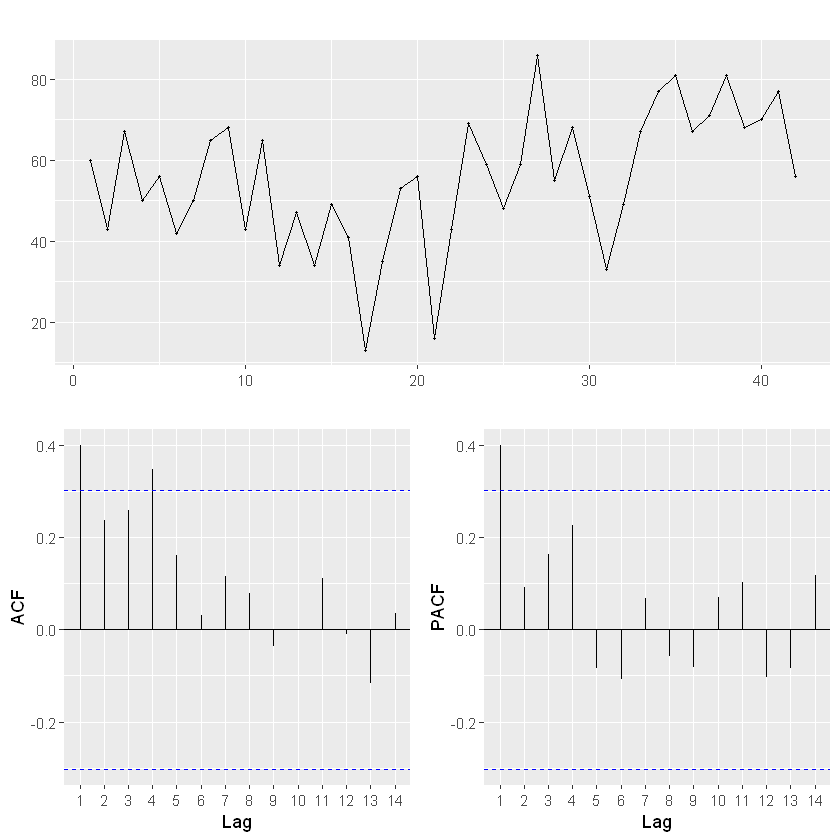

In [7]:
ggtsdisplay(ts_kings)

In [8]:
#kpss검정
summary(ur.kpss(ts_kings))
# 검정통계량값이 1pct의 임계치보다 작으므로 귀무가설 채택! 해당 데이터는 정상성이다.


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.4913 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [10]:
# 차분횟수 추천
ndiffs(ts_kings)

[1] 1


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.0813 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


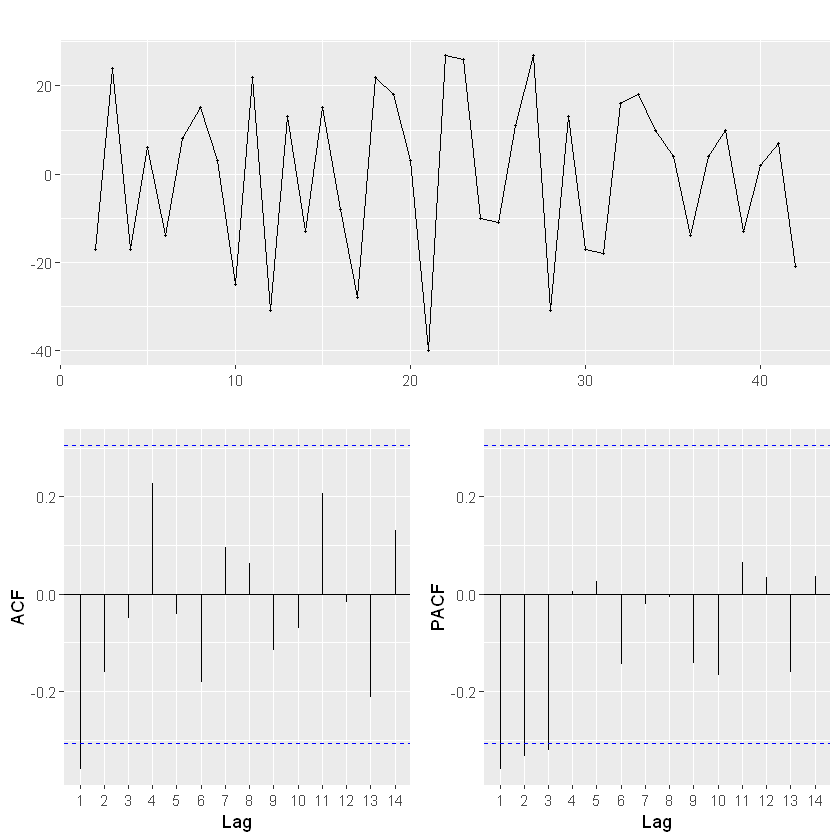

In [12]:
ggtsdisplay(diff(ts_kings))
summary(ur.kpss(diff(ts_kings)))

In [13]:
# 1번 일반차분한 데이터의 ACF,PACF 그래프그림 통해 ARIMA 차수 정하기
# ACF함수에서 튀어나온 막대가 1개이긴 한데 살짝 튀어나왔으므로 MA(0) or MA(1)
# PACF함수에서 튀어나온 막대가 2개정도 되긴하지만 모두 살짝 튀어나왔으므로 AR(0) or AR(1) or AR(2)
# 모델 후보
# ARIMA(0,1,0)
# ARIMA(0,1,1)
# ARIMA(0,1,2)
# ARIMA(1,1,0)
# ARIMA(1,1,1)
# ARIMA(1,1,2)
# auto.arima

arima010<-Arima(ts_kings, order=c(0,1,0))
arima011<-Arima(ts_kings, order=c(0,1,1))
arima012<-Arima(ts_kings, order=c(0,1,2))
arima110<-Arima(ts_kings, order=c(1,1,0))
arima111<-Arima(ts_kings, order=c(1,1,1))
arima112<-Arima(ts_kings, order=c(1,1,2))
arima_auto<-auto.arima(ts_kings)

summary(arima010)
summary(arima011)
summary(arima012)
summary(arima110)
summary(arima111)
summary(arima112)
summary(arima_auto)

Series: ts_kings 
ARIMA(0,1,0) 

sigma^2 estimated as 328.6:  log likelihood=-176.97
AIC=355.94   AICc=356.04   BIC=357.65

Training set error measures:
                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.09380952 17.90983 15.52524 -11.41712 38.15135 0.9762803
                   ACF1
Training set -0.3601964
Series: ts_kings 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 estimated as 236.2:  log likelihood=-170.06
AIC=344.13   AICc=344.44   BIC=347.56

Training set error measures:
                    ME     RMSE      MAE       MPE    MAPE      MASE       ACF1
Training set 0.9712931 14.99836 11.92162 -10.40664 29.5176 0.7496724 0.05350284
Series: ts_kings 
ARIMA(0,1,2) 

Coefficients:
          ma1      ma2
      -0.6325  -0.1209
s.e.   0.1637   0.1666

sigma^2 estimated as 239.2:  log likelihood=-169.81
AIC=345.63   AICc=346.28   BIC=350.77

Training set error measures:
                   ME     RMSE      MAE       MP


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 4.2785, df = 7, p-value = 0.7472

Model df: 1.   Total lags used: 8



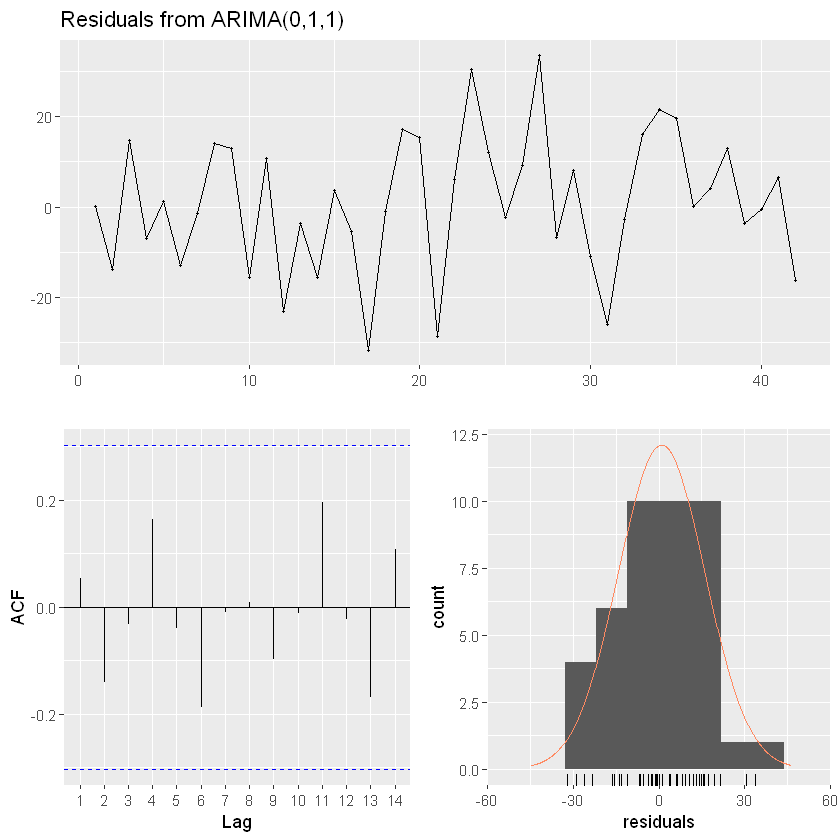

In [14]:
# arima011 모델이 가장 적합!
# (1-B)^1 * yt = 0 + (1 + (-0.7218)*B )

# 잔차 검정
checkresiduals(arima011)

In [15]:
# 선정모델로 5개 값 예측하기
for_arima011<-forecast(arima011, h=5)
for_arima011

   Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
43       67.75063 48.05479 87.44646 37.62845  97.87281
44       67.75063 47.30662 88.19463 36.48422  99.01703
45       67.75063 46.58489 88.91637 35.38042 100.12084
46       67.75063 45.88696 89.61429 34.31304 101.18822
47       67.75063 45.21064 90.29062 33.27869 102.22257

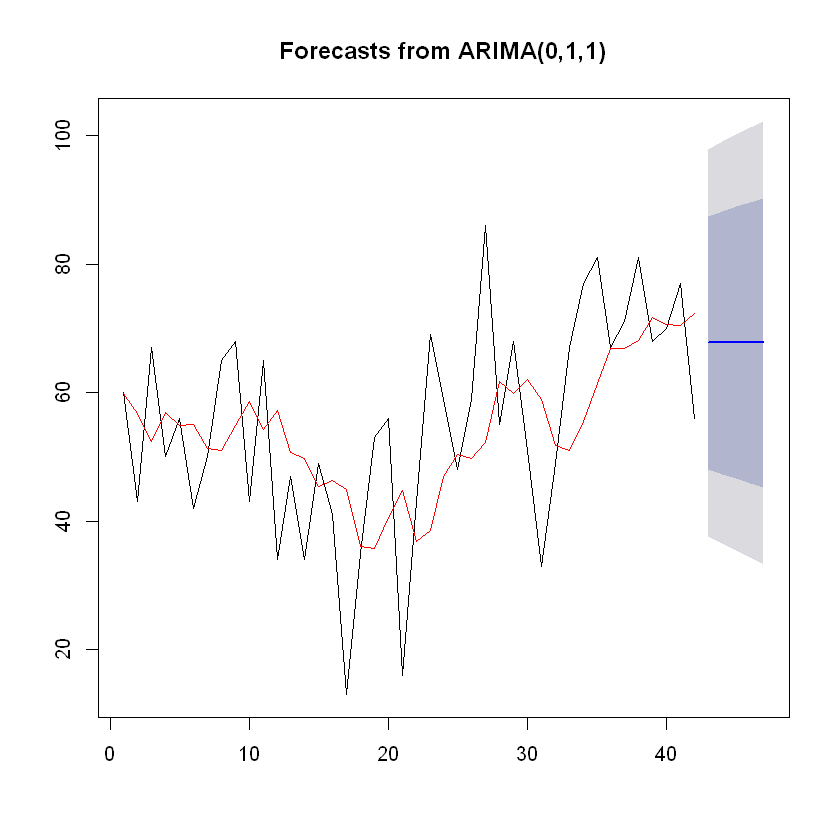

In [17]:
# 원 데이터, 적합 데이터, 예측값 데이터 그려보기
plot(for_arima011)
lines(for_arima011$fitted, col='red')

In [ ]:
# 적합시킨 모델이 자기회귀 하지않고 차분과 이동평균만 한 모델이므로 미래값이 하나의 값으로 예측됨